In [8]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



#<div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

- <span style="color:green">**Ilias RAMI**</span>
- <span style="color:green">**Samar RABEH**</span>


<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [9]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import scipy.signal
import IPython.display as ipd
import scipy.io.wavfile as wav
import librosa

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [10]:
#read the file
fs, data = wav.read("coloniedefourmies.wav")
print("Sampling frequency: ", fs)
print("Data type: ", data.dtype)
print("Data shape: ", data.shape)
#play the file
ipd.Audio(filename="coloniedefourmies.wav")


Sampling frequency:  44100
Data type:  float32
Data shape:  (376571,)


<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

Duration of the signal:  8.539024943310658 s
Time vector shape:  (376571,)


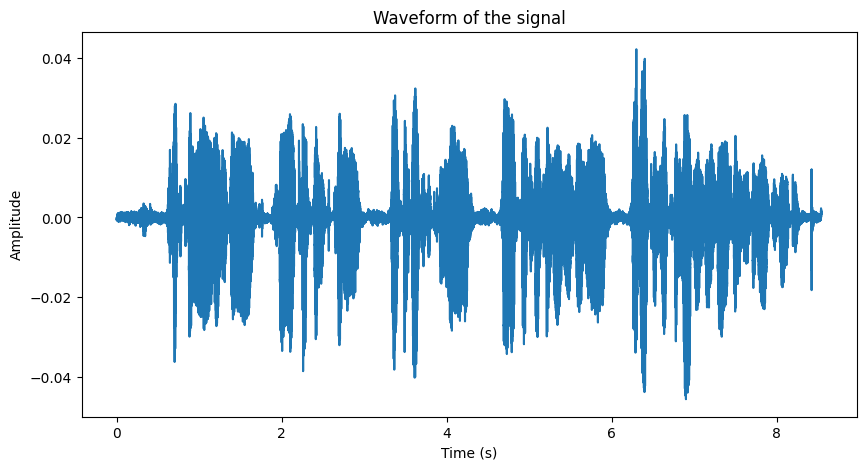

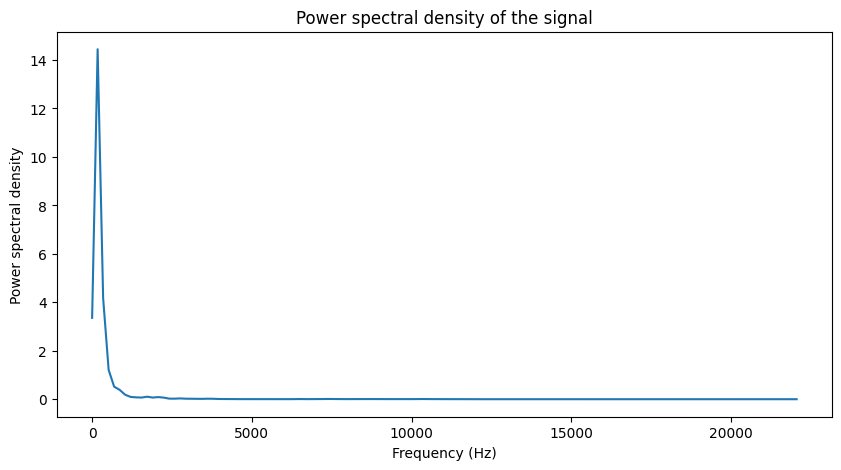

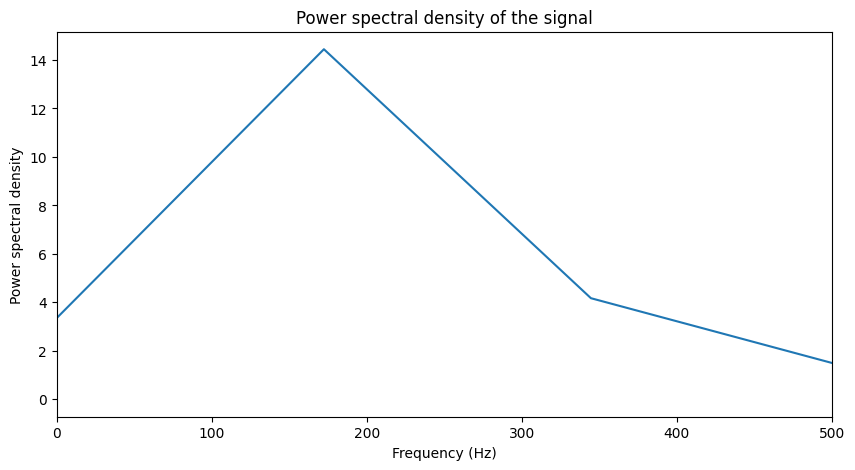

In [11]:
duration = len(data)/fs #duration of the signal in seconds
print("Duration of the signal: ", duration, "s")
time = np.arange(0, duration, 1/fs) #time vector
print("Time vector shape: ", time.shape)
#visualisation de la forme d'onde temporelle du signal
plt.figure(figsize=(10, 5))
plt.plot(time, data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of the signal")
plt.show()

#estimation of the power spectral density
f, Pxx = scipy.signal.welch(data*10000, fs, nperseg=256)

#visualisation of the power spectral density
plt.figure(figsize=(10, 5))
plt.plot(f, Pxx)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectral density")
plt.title("Power spectral density of the signal")
plt.show()


#visualisation of the zoomed power spectral density
plt.figure(figsize=(10, 5))
plt.plot(f, Pxx)
plt.xlim(0, 500)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectral density")
plt.title("Power spectral density of the signal")
plt.show()


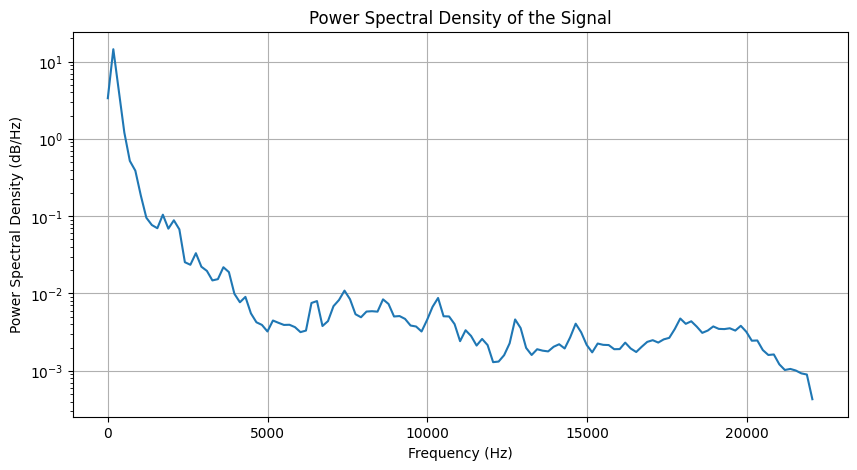

In [12]:

# Plot on a logarithmic scale to better visualize the power distribution
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)  # We use semilogy for logarithmic scale on y-axis

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB/Hz)")
plt.title("Power Spectral Density of the Signal")
plt.grid(True)  
plt.show()


<span style="color:green">**The graph shows a significant peak around 150 Hz, which typically corresponds to the fundamental frequency of a male voice. The power density decreases rapidly at higher frequencies, suggesting that the male voice primarily consists of lower frequencies, but not excessively low.
The peaks around 15,000 Hz and higher may represent background noise or electronic artifacts, as typical human speech doesn't contain significant energy at such high frequencies.**</span>. 


<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

##Hyperparameters for spectrogram

- <span style="color:green">**nperseg=256 and nfft=256: window length (in samples)
Often taken as a power of 2 (for FFT) and linked to the desired frequency resolution.
This choice provides a good balance between temporal resolution and frequency resolution for voice analysis. With vocal signals, we generally want to capture fine details in both the time and frequency domains.**</span>



  
- <span style="color:green">**noverlap=128 (50% overlap between two successive frames (in samples)): The overlap helps smooth the spectrogram and ensures that short events are captured without discontinuities between segments. Often taken as 50% or 75% of the window length and characterizes the time resolution**</span>
  
- <span style="color:green">**Hanning Window: Traditionally, in order to limit side effects, the signal frame is multiplied by an analysis window.**</span>


Spectrogram shape:  (129, 2940)


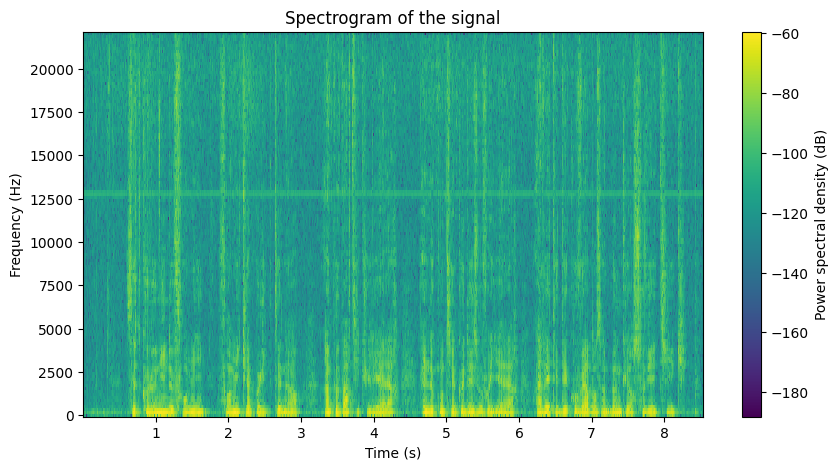

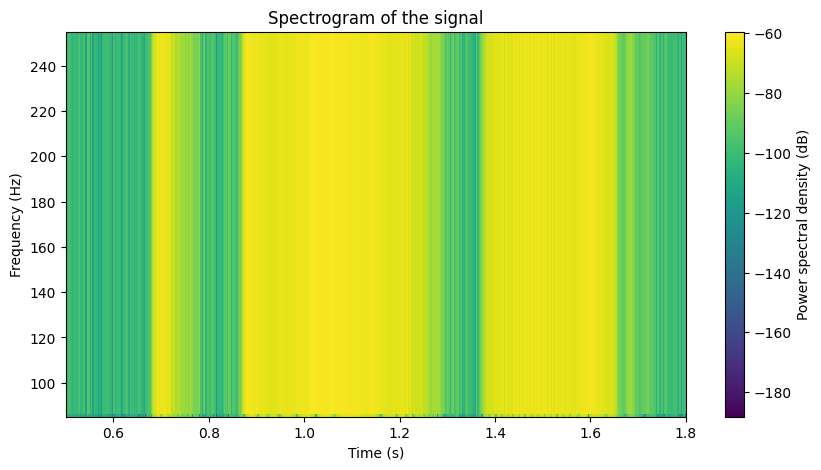

In [10]:
#compute the spectrogram
f, t, Sxx = scipy.signal.spectrogram(data, fs, nperseg=256 ,nfft=256, noverlap=256//2,window='hann')
print("Spectrogram shape: ", Sxx.shape)

#visualisation of the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("Spectrogram of the signal")
plt.colorbar(label="Power spectral density (dB)")
plt.show()

#Selection of a Relevant Portion for Pitch Estimation
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("Spectrogram of the signal")
plt.colorbar(label="Power spectral density (dB)")
plt.xlim(0.5, 1.8)
plt.ylim(85, 255)
plt.show()

- <span style="color:green">**The pitch of a sound corresponds to the fundamental frequency, which appears as a horizontal line in the spectrogram.
We visually identify the most prominent horizontal lines representing the fundamental frequency and its harmonics.
horizontal lines indicate sustained pitches, if the pitch varies, the lines move up and down accordingly.**</span>
- <span style="color:green">**The pitch here is around 150 Hz**</span>

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

Commentez vos résultats.
    </div>

- <span style="color:green">**This code estimates the pitch of a given audio signal using a simple method based on spectrogram analysis. The audio is divided into short frames (20 ms), and for each frame, the spectrogram is calculated to find the dominant frequency, which is assumed to correspond to the pitch. The pitch is then filtered to fall within the typical frequency range of the human voice (50-500 Hz) to avoid noise and harmonics.**</span>


The estimation of the  Pitch is: 150.0


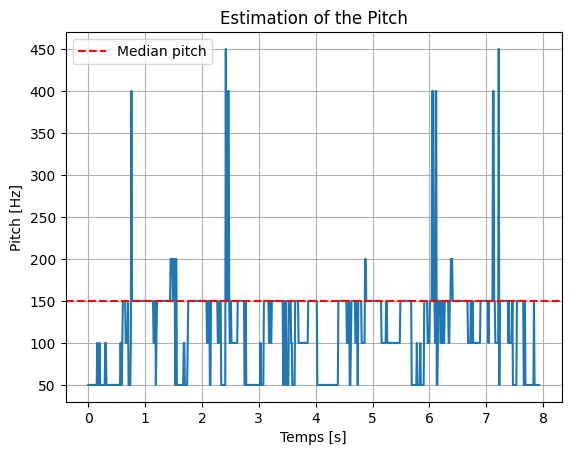

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

"""
This code estimates the pitch of a given audio signal using a simple method based on spectrogram analysis. 
The audio is divided into short frames (20 ms), and for each frame, the spectrogram is computed to find 
the dominant frequency, which is assumed to correspond to the pitch. The pitch is filtered to fall within 
the typical voice frequency range (50-500 Hz) to avoid noise and harmonics. The results are presented 
visually, showing the pitch variation over time, and the median pitch is calculated to provide a robust 
estimate of the overall pitch.
"""

fen_length = int(0.02 * fs)  # Frame length (20 ms)
overlap = int(0.01 * fs)     # Overlap (10 ms)

pitches = []

# Loop through the signal with the specified frame length and overlap
for i in range(0, len(data) - fen_length, overlap):
    fen = data[i:i + fen_length]
    
    # Calculate the spectrogram for the current frame
    f, t, Sxx = scipy.signal.spectrogram(fen, fs=fs, nperseg=fen_length, noverlap=overlap)
    
    # Find the dominant frequency in the frame
    dominant_frequency = f[np.argmax(Sxx, axis=0)]
    
    # Filter the dominant frequency to a pitch range between 50 and 500 Hz (adjustable based on the expected voice range)
    if 50 <= dominant_frequency <= 500:
        pitches.append(dominant_frequency)

# Calculate the median pitch to avoid outliers
print("The estimation of the  Pitch is:", np.median(pitches))

# Create a time axis for the pitch plot
temps = np.arange(0, len(pitches) * overlap, overlap) / fs

# Plot the estimated pitch over time
plt.plot(temps, pitches)
plt.xlabel('Temps [s]')
plt.ylabel('Pitch [Hz]')
plt.title('Estimation of the Pitch')
plt.grid(True)
#plot the median pitch
plt.axhline(np.median(pitches), color='r', linestyle='--', label='Median pitch')
plt.legend()
plt.show()



### <div class=consignes>Librosa library test</div>

The estimation of the  Pitch is: 133.97815704345703


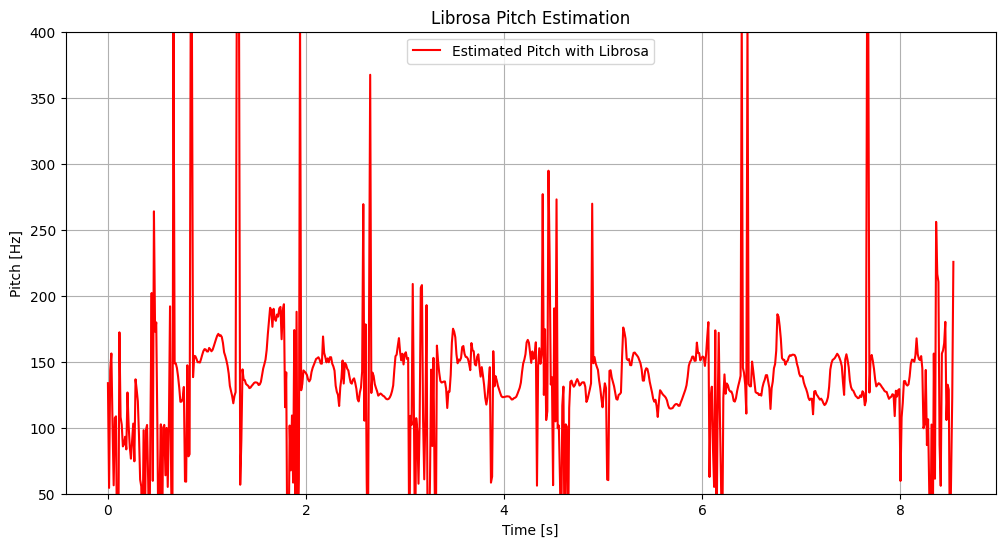

In [18]:

# Load the audio file
y, sr = librosa.load('coloniedefourmies.wav', sr=None)

# Estimate the pitch (fundamental frequency) using the librosa method
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=50, fmax=450)

# Extract the dominant pitch at each frame
pitch_values = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:  # Exclude frames without detected pitch
        pitch_values.append(pitch)
    else:
        pitch_values.append(0)

# Calculate the median pitch to avoid outliers
print("The estimation of the  Pitch is:", np.median(pitch_values))

# Create a time axis
time_axis_librosa = np.linspace(0, len(y) / sr, len(pitch_values))

# Plot the estimated pitch using librosa
plt.figure(figsize=(12, 6))
plt.plot(time_axis_librosa, pitch_values, label='Estimated Pitch with Librosa', color='r')
plt.title('Librosa Pitch Estimation')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [Hz]')
plt.ylim(50, 400)
plt.grid(True)
plt.legend()
plt.show()



-<span style="color:green">**The first method (custom spectrogram-based method) gives a median pitch of 150 Hz.**</span>

-<span style="color:green">**The Librosa method gives a median pitch of 133 Hz.**</span>

 <span style="color:green">**150 Hz vs. 133 Hz: Both of these values fall within the typical pitch range for male speakers (85-180 Hz), but the discrepancy suggests that the custom method might be overestimating certain peaks.**</span>


## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

### <div class=consignes>Data Loading</div>

In [15]:
donnees = np.load('signaux_impulsions.npz')
print(donnees.files)
signaux = donnees['data']
labels = donnees['labels']
energies=[]

['data', 'labels']


## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

y[n]=(x[n] 
2
 )∗h[n]= 
m=−∞
∑
∞
​
 x[m] 
2
 ⋅h[n−m]

In [35]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float, kernel_size: int = 30) -> bool:
    """
    Determines if a signal contains an impulse based on its energy.

    Args:
    - signal: The input signal (numpy array).
    - seuil: The energy threshold to decide if an impulse is present.
    - kernel_size: Size of the convolution kernel.

    Returns:
    - bool: True if the signal contains an impulse, False otherwise.
    """
    # Calculate the squared signal for energy computation
    signal_squared = signal ** 2 
    
    # Create a convolution kernel for smoothing
    noyau = (1 / kernel_size) * np.ones(kernel_size) 
    
    # Compute the smoothed energy of the signal
    energie = np.convolve(signal_squared, noyau, mode='same')  # Use 'same' to keep the output size same as input
    
    # Check if the mean energy deviates significantly from the maximum energy
    if np.abs(np.mean(energie) - np.max(energie)) < seuil:
        return False  # No impulse detected
    else:
        return True   # Impulse detected

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [37]:
# List to hold predictions
predictions = []
seuil=0.5
# Apply the method to all signals
for signal in signaux:
    predictions.append(contient_impulsion_energie(signal, seuil))

# Convert predictions to a numpy array for easier manipulation
predictions = np.array(predictions)

# Calculate the accuracy of the predictions
accuracy = np.mean(predictions == labels) * 100  # Percentage of correct predictions

# Print results
print(f"Threshold: {seuil}")
print(f"Predictions: {predictions}")
print(f"True Labels: {labels}")
print(f"Accuracy: {accuracy:.2f}%")

Threshold: 0.5
Predictions: [False False False ... False  True  True]
True Labels: [0. 0. 0. ... 0. 1. 1.]
Accuracy: 89.98%


<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

Vrais Positifs:  4044


C:\Users\ilyas\AppData\Local\Temp\ipykernel_17452\625821782.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Négatif', 'Positif'])
C:\Users\ilyas\AppData\Local\Temp\ipykernel_17452\625821782.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Négatif', 'Positif'])


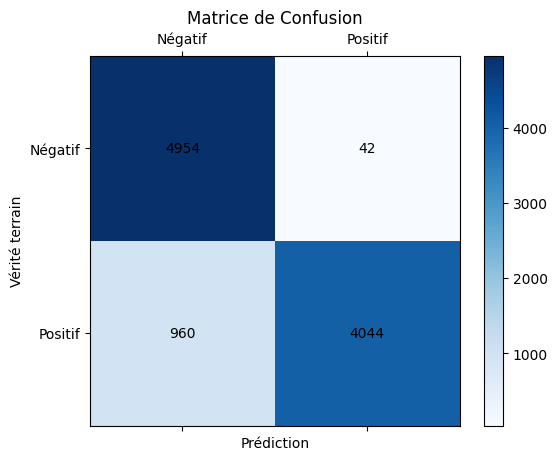

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de valeurs
# Assuming predictions and labels are defined
# predictions = ... (array of predicted labels)
# labels = ... (array of true labels)

vp = np.sum((predictions == 1) & (labels == 1))  # Vrais Positifs
vn = np.sum((predictions == 0) & (labels == 0))  # Vrais Négatifs
fp = np.sum((predictions == 1) & (labels == 0))  # Faux Positifs
fn = np.sum((predictions == 0) & (labels == 1))  # Faux Négatifs
print("Vrais Positifs: ", vp)

# Création de la matrice de confusion
confusion_matrix = np.array([[vn, fp],
                             [fn, vp]])

# Affichage avec des couleurs
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)  # Choix du colormap
plt.colorbar(cax)

# Ajouter des étiquettes
ax.set_xticklabels(['', 'Négatif', 'Positif'])
ax.set_yticklabels(['', 'Négatif', 'Positif'])

# Ajouter des annotations (valeurs de la matrice)
for (i, j), val in np.ndenumerate(confusion_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center')

plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de Confusion')
plt.show()

# # Calcul de la précision et du rappel
# precision = vp / (vp + fp) 
# rappel = vp / (vp + fn)

# print("Précision: ", precision)
# print("Rappel: ", rappel)


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [40]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    """
    Détermine si un signal contient une impulsion en utilisant son spectrogramme.
    
    Args:
        signal (np.ndarray): Signal d'entrée à analyser.
        seuil (float): Seuil pour décider de la présence d'une impulsion.

    Returns:
        bool: True si une impulsion est détectée, sinon False.
    """
    # Calcul du spectrogramme
    # seuil*=0.01
    f, t, Sxx = scipy.signal.spectrogram(signal, fs=1000)

    # Vérification de la condition basée sur la différence
    if np.abs(np.mean(Sxx) - np.max(Sxx)) > seuil:
        return True  # Impulsion détectée
    else:
        return False  # Aucune impulsion détectée


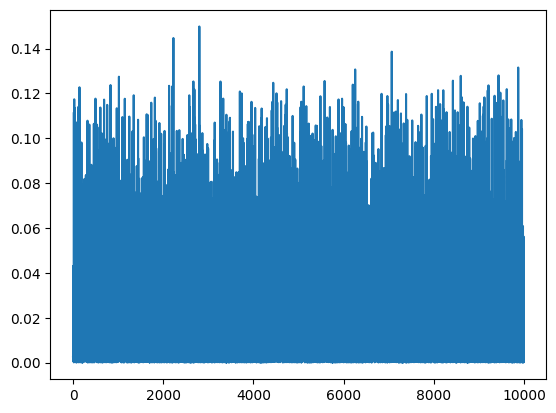

In [19]:
imp2 = []
# Appliquer la méthode à tous les signaux
for signal in signaux:
        f, t, Sxx = scipy.signal.spectrogram(signal, fs=1000)
        imp2.append(np.abs(np.mean(Sxx) - np.max(Sxx)))

plt.plot(imp2)


<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [44]:
seuil = 0.006 #On teste la méthode avec ce seuil.
imp2 = []
# Appliquer la méthode à tous les signaux
for signal in signaux:
    imp2.append(contient_impulsion_spectrogramme(signal, seuil)) # On utilise la méthode contient_impulsion_spectrogramme


imp2 = np.array(imp2)

# Your current code for calculating confusion matrix remains the same
vp = np.sum((imp2 == 1) & (labels == 1))  # Vrais Positifs
vn = np.sum((imp2 == 0) & (labels == 0))  # Vrais Négatifs
fp = np.sum((imp2 == 1) & (labels == 0))  # Faux Positifs
fn = np.sum((imp2 == 0) & (labels == 1))  # Faux Négatifs

# Création de la matrice de confusion
confusion_matrix = np.array([[vn, fp],
                             [fn, vp]])
print(confusion_matrix)


# Avoid division by zero by checking the denominator
precision = vp / (vp + fp) if (vp + fp) != 0 else 0
rappel = vp / (vp + fn) if (vp + fn) != 0 else 0

accuracy = np.mean(imp2 == labels) * 100  # Percentage of correct predictions
print(f"Threshold: {seuil}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {rappel:.4f}")


labels [0. 0. 0. ... 0. 1. 1.]
type imp2 [False, False, False, False, True, True, False, True, False, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, True, False, True, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, True, True, False, True, True, True, False, False, False, True, False, True, False, False, True, False, False, False, True, False, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, False, True, False, True, False, True, False, True, False, False, False, False, False, False, True, True, True, True, False, False, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, Fal

## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

<span style="color:green">**Precision is a measure that indicates the proportion of signals identified by the algorithm as containing an impulse that are actually correct. In other words, among the set of signals that the method considers relevant, what proportion actually contains an impulse? High precision implies that the method makes few errors in its statements regarding the presence of impulses.**<span>
    

<span style="color:green">**Recall evaluates the algorithm's ability to identify all the impulses that are actually present in the signals. In other words, among all the signals that actually contain an impulse, what proportion has been correctly identified? High recall indicates that the method is effective at detecting all present impulses, although it may also identify an increased number of false positives if the precision is lower.**<span>
    

In [46]:
def compute(predictions, labels):
    vp = np.sum((predictions == 1) & (labels == 1))  # Vrais Positifs
    vn = np.sum((predictions == 0) & (labels == 0))  # Vrais Négatifs
    fp = np.sum((predictions == 1) & (labels == 0))  # Faux Positifs
    fn = np.sum((predictions == 0) & (labels == 1))  # Faux Négatifs
    
    # Calcul de la précision et du rappel
    precision = vp / (vp + fp) 
    rappel = vp / (vp + fn)

    print("Précision: ", precision)
    print("Rappel: ", rappel)
    return precision, rappel

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

In [51]:
seuil = np.arange(0,1.5,0.1) #Seuils 0.4, 0.41, 0.42, ..., 0.5
precision_1 = []
rappel_1 = []
precision_2 = []
rappel_2 = []

for s in seuil:
    # Appliquer la méthode à tous les signaux
    predictions_1 = []
    predictions_2 = []
    for signal in signaux:
        predictions_1.append(contient_impulsion_energie(signal, s))
        predictions_2.append(contient_impulsion_spectrogramme(signal, s*0.01))
    predictions_1 = np.array(predictions_1)
    predictions_2 = np.array(predictions_2)
    print("Seuil: ", s)
    print("Méthode 1:")
    p1, r1 = compute(predictions_1, labels)
    print("Méthode 2:")
    p2, r2 = compute(predictions_2, labels)
    precision_1.append(p1)
    rappel_1.append(r1)
    precision_2.append(p2)
    rappel_2.append(r2)

Seuil:  0.0
Méthode 1:
Précision:  0.5004
Rappel:  1.0
Méthode 2:
Précision:  0.5004
Rappel:  1.0
Seuil:  0.1
Méthode 1:
Précision:  0.6350114416475973
Rappel:  0.9982014388489209
Méthode 2:
Précision:  0.58681906614786
Rappel:  0.9644284572342127
Seuil:  0.2
Méthode 1:
Précision:  0.7500377130788958
Rappel:  0.9936051159072742
Méthode 2:
Précision:  0.6675155631013017
Rappel:  0.9428457234212629
Seuil:  0.30000000000000004
Méthode 1:
Précision:  0.8681434599156118
Rappel:  0.986810551558753
Méthode 2:
Précision:  0.74663640784568
Rappel:  0.9204636290967226
Seuil:  0.4
Méthode 1:
Précision:  0.9642927599131978
Rappel:  0.9768185451638689
Méthode 2:
Précision:  0.8378830083565459
Rappel:  0.9016786570743405
Seuil:  0.5
Méthode 1:
Précision:  0.9897209985315712
Rappel:  0.8081534772182254
Méthode 2:
Précision:  0.9184894758563764
Rappel:  0.8894884092725819
Seuil:  0.6000000000000001
Méthode 1:
Précision:  0.9975932611311673
Rappel:  0.4970023980815348
Méthode 2:
Précision:  0.969088098

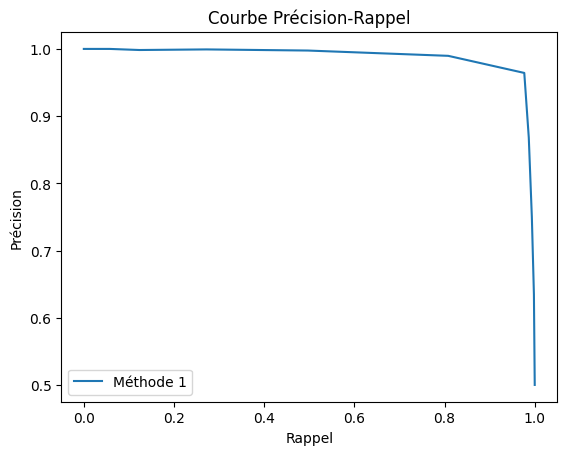

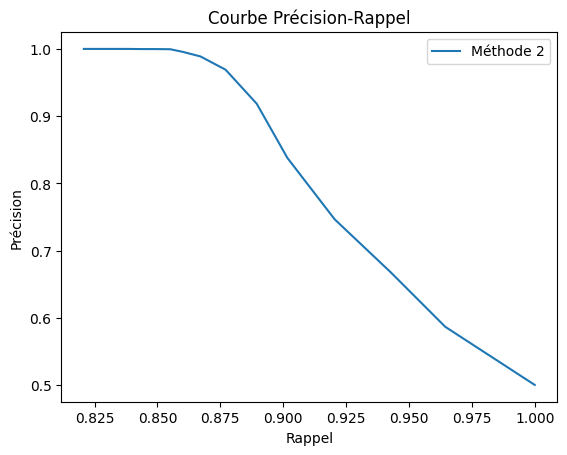

In [52]:
# Affichage du plan (précision,rappel) pour les différents seuils considérés:

plt.plot(rappel_1, precision_1, label="Méthode 1")

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.show()

plt.plot(rappel_2, precision_2, label="Méthode 2")

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.show()



    
<span style="color:green">**Method 1 (energy-based) shows a more stable precision and remains high over a broader range of recall values, indicating that it is better at distinguishing impulses.**<span>
    
<span style="color:green">**Method 2 (spectrogram-based) exhibits a more rapid drop in precision as recall increases, suggesting that it is more prone to false positives when attempting to capture more true positives.**<span>
    
    
<span style="color:green">**Thus, Method 1 appears to be more robust and reliable across a wider range of threshold parameters, while Method 2 is more sensitive to specific settings.**<span>
    

